Diabetes Health Indicators DATASET
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

#Sklearn cross-validaton and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

#Pipeline
from imblearn.pipeline import Pipeline

#SMOTEENN
from imblearn.combine import SMOTEENN
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

#Simple Methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import validation_curve

#Deep Learning Methods
import keras
from keras import models
from keras import Input, layers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model

#Keras Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, CSVLogger

In [2]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
#Dropping columns that do not match the cardiovascular disease dataset
data = data.drop('CholCheck', axis=1)
data = data.drop('Stroke', axis=1)
data = data.drop('HeartDiseaseorAttack', axis=1)
data = data.drop('Fruits', axis=1)
data = data.drop('Veggies', axis=1)
data = data.drop('AnyHealthcare', axis=1)
data = data.drop('NoDocbcCost', axis=1)
data = data.drop('GenHlth', axis=1)
data = data.drop('MentHlth', axis=1)
data = data.drop('PhysHlth', axis=1)
data = data.drop('DiffWalk', axis=1)
data = data.drop('Education', axis=1)
data = data.drop('Income', axis=1)

In [4]:
data = shuffle(data)
data.head(10)

Diabetes_binary  HighBP  HighChol   BMI  Smoker  PhysActivity  \
63376               0.0     0.0       1.0  21.0     1.0           1.0   
66032               0.0     0.0       0.0  40.0     1.0           0.0   
205012              0.0     0.0       0.0  35.0     0.0           1.0   
96569               0.0     1.0       1.0  25.0     1.0           1.0   
119204              0.0     0.0       0.0  22.0     1.0           1.0   
177163              0.0     0.0       0.0  26.0     1.0           0.0   
162350              0.0     1.0       1.0  30.0     1.0           1.0   
174576              0.0     0.0       0.0  21.0     1.0           1.0   
218523              0.0     0.0       0.0  34.0     0.0           1.0   
218857              0.0     0.0       1.0  26.0     0.0           1.0   

        HvyAlcoholConsump  Sex   Age  
63376                 0.0  1.0   8.0  
66032                 0.0  1.0   3.0  
205012                0.0  0.0   6.0  
96569                 0.0  0.0  12.0  
119204                1.0  0.0  10.0  
177163                0.0  1.0   4.0  
162350                1.0  0.0   8.0  
174576                0.0  0.0   9.0  
218523                0.0  0.0   4.0  
218857                0.0  0.0   9.0

In [5]:
print(len(data.index))

253680


In [6]:
X = data.drop('Diabetes_binary', axis=1).head(5000).values
Y = data['Diabetes_binary'].head(5000).values

In [7]:
counter = Counter(Y)
print('Before', counter)

smoteenn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'), random_state=21)
X_sampled, Y_sampled = smoteenn.fit_resample(X, Y)


counter = Counter(Y_sampled)
print('After', counter)

Before Counter({0.0: 4296, 1.0: 704})
After Counter({1.0: 2996, 0.0: 2539})


In [8]:
from imblearn.over_sampling import ADASYN

counter = Counter(Y)
print('Before', counter)

adasyn = ADASYN(random_state=21)
X_sampled, Y_sampled = adasyn.fit_resample(X, Y)

counter = Counter(Y_sampled)
print('After', counter)

Before Counter({0.0: 4296, 1.0: 704})
After Counter({0.0: 4296, 1.0: 4229})


# GuassianNB

In [9]:
#Validation Curve for GuassianNB

In [10]:
param_range = np.logspace(-9, 0, 10)

# Calculate accuracy on training and test set using the validation curve
train_scores, test_scores = validation_curve(
    GaussianNB(),
    X_sampled, Y_sampled,
    param_name="var_smoothing",
    param_range=param_range,
    cv=5,
    scoring="recall"
)

In [11]:
# Calculate mean and standard deviation of training scores
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

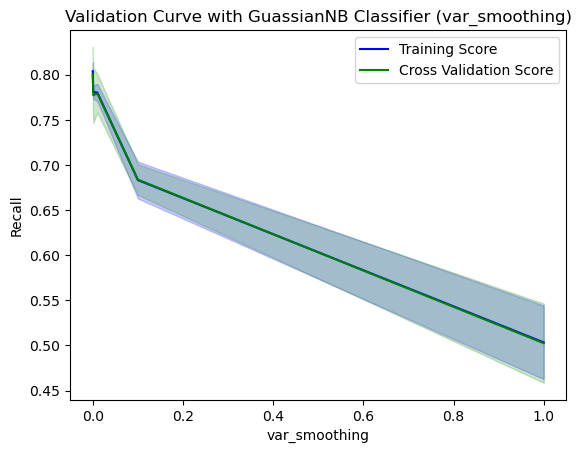

In [12]:
# Plot mean recall scores for training and testing scores
plt.plot(param_range, mean_train_score, label="Training Score", color='b')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='g')

# Plot the recall bands
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.2, color='blue')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.2, color='green')

# Create the plot
plt.title("Validation Curve with GuassianNB Classifier (var_smoothing)")
plt.xlabel("var_smoothing")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [61]:
#Using SMOTE-ENN to balance the data
#Define model
model1 = GaussianNB(var_smoothing=0.0)
#Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline = Pipeline(steps=[('m', model1)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=21)
#Evaluate model
scoring=['accuracy','precision','recall', 'f1']
scores = cross_validate(pipeline, X_sampled, Y_sampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall']))
print('Mean F1: %.4f' % np.mean(scores['test_f1']))

Mean Accuracy: 0.7043
Mean Precision: 0.6680
Mean Recall: 0.8033
Mean F1: 0.7294


# KNearestNeighbour

In [14]:
#Validation Plot for KNN

In [15]:
param_range = np.arange(1, 10, 1)

# Calculate accuracy on training and test set using the validation curve
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X_sampled, Y_sampled,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="recall"
)

In [16]:
# Calculate mean and standard deviation of training scores
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

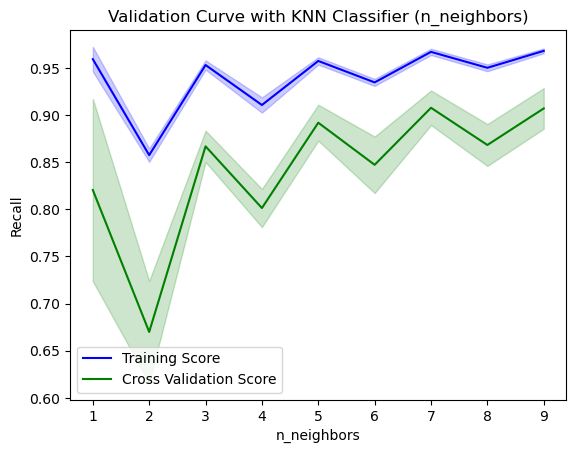

In [17]:
# Plot mean recall scores for training and testing scores
plt.plot(param_range, mean_train_score, label="Training Score", color='b')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='g')

# Plot the recall bands
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.2, color='blue')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.2, color='green')

# Create the plot
plt.title("Validation Curve with KNN Classifier (n_neighbors)")
plt.xlabel("n_neighbors")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [18]:
#Using SMOTE-ENN to balance the data
#Define model
model = KNeighborsClassifier(n_neighbors=5)
#Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=21)
#Evaluate model
scoring=['accuracy','precision','recall', 'f1']
scores = cross_validate(pipeline, X_sampled, Y_sampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall']))
print('Mean F1: %.4f' % np.mean(scores['test_f1']))

Mean Accuracy: 0.8248
Mean Precision: 0.8228
Mean Recall: 0.8245
Mean F1: 0.8236


# Support Vector Machine (SVM)

In [19]:
#Validtion curve for Support Vector Machine (SVM)

In [20]:
param_range = np.logspace(-3, 3, 7)

# Calculate accuracy on training and test set using the validation curve
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma='scale', random_state=21),
    X_sampled, Y_sampled,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="recall"
)

In [21]:
# Calculate mean and standard deviation of training scores
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

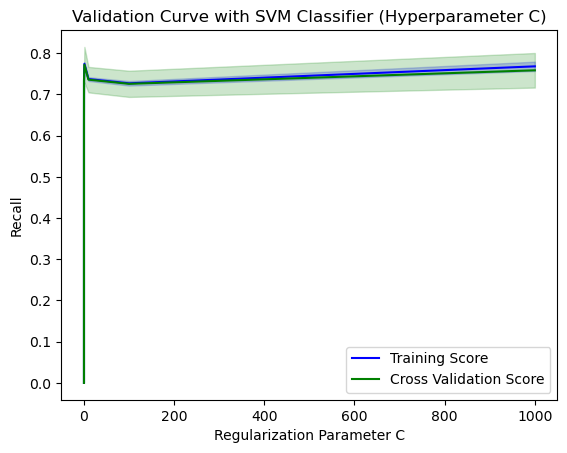

In [22]:
# Plot mean recall scores for training and testing scores
plt.plot(param_range, mean_train_score, label="Training Score", color='b')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='g')

# Plot the recall bands
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.2, color='blue')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.2, color='green')

# Create the plot
plt.title("Validation Curve with SVM Classifier (Hyperparameter C)")
plt.xlabel("Regularization Parameter C")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [23]:
#Using SMOTE-ENN to balance the data
#Define model
model = SVC(kernel='rbf', gamma='scale', random_state=21)
#Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=21)
#Evaluate model
scoring=['accuracy','precision','recall', 'f1']
scores = cross_validate(pipeline, X_sampled, Y_sampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall']))
print('Mean F1: %.4f' % np.mean(scores['test_f1']))

Mean Accuracy: 0.8188
Mean Precision: 0.8167
Mean Recall: 0.8187
Mean F1: 0.8176


# Logistic Regression

In [24]:
#Validtion curve for Logistic Regression

In [62]:
param_range = np.logspace(-3, 3, 7)

# Calculate accuracy on training and test set using the validation curve
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=5000),
    X_sampled, Y_sampled,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="recall"
)

In [63]:
# Calculate mean and standard deviation of training scores
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

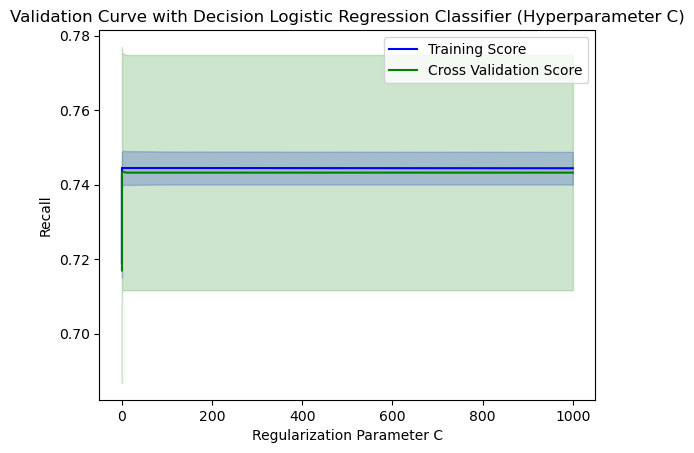

In [64]:
# Plot mean recall scores for training and testing scores
plt.plot(param_range, mean_train_score, label="Training Score", color='b')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='g')

# Plot the recall bands
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.2, color='blue')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.2, color='green')

# Create the plot
plt.title("Validation Curve with Decision Logistic Regression Classifier (Hyperparameter C)")
plt.xlabel("Regularization Parameter C")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [28]:
#Using SMOTE-ENN to balance the data
#Define model
model = LogisticRegression(random_state=21)
#Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline = Pipeline(steps=[('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=21)
#Evaluate model
scoring=['accuracy','precision','recall', 'f1']
scores = cross_validate(pipeline, X_sampled, Y_sampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall']))
print('Mean F1: %.4f' % np.mean(scores['test_f1']))

Mean Accuracy: 0.7138
Mean Precision: 0.6991
Mean Recall: 0.7431
Mean F1: 0.7204


# Decision Trees

In [29]:
#Validation curve for the Decision Tree

In [30]:
param_range = np.arange(1,21)

# Calculate accuracy on training and test set using the validation curve
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=21),
    X_sampled, Y_sampled,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="recall"
)

In [31]:
# Calculate mean and standard deviation of training scores
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

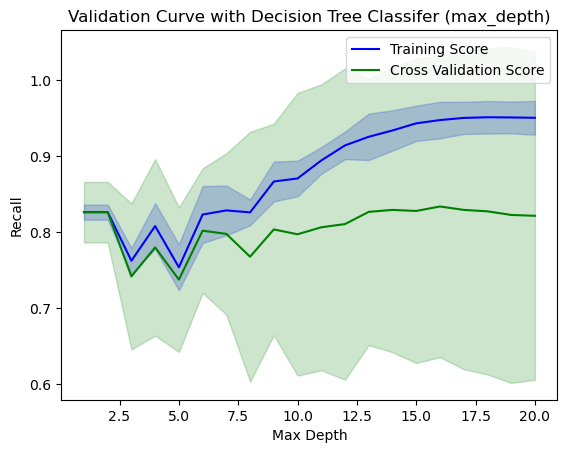

In [32]:
# Plot mean recall scores for training and testing scores
plt.plot(param_range, mean_train_score, label="Training Score", color='b')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='g')

# Plot the recall bands
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.2, color='blue')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.2, color='green')

# Create the plot
plt.title("Validation Curve with Decision Tree Classifer (max_depth)")
plt.xlabel("Max Depth")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [33]:
#Using SMOTE-ENN to balance the data
#Define model
model = DecisionTreeClassifier(random_state=21, max_depth=6)
#Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline = Pipeline(steps=[('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=21)
#Evaluate model
scoring=['accuracy','precision','recall', 'f1']
scores = cross_validate(pipeline, X_sampled, Y_sampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall']))
print('Mean F1: %.4f' % np.mean(scores['test_f1']))

Mean Accuracy: 0.8044
Mean Precision: 0.8017
Mean Recall: 0.8063
Mean F1: 0.8034


# Random Forest 

In [34]:
#Validtion curve for Random Forest

In [65]:
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using the validation curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    X_sampled, Y_sampled,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

In [66]:
# Calculate mean and standard deviation of training scores
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

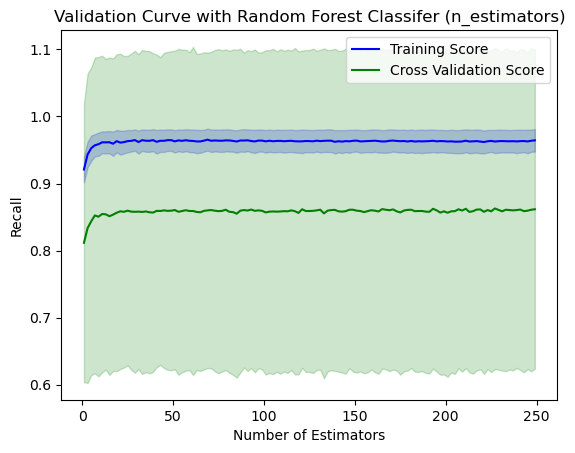

In [67]:
# Plot mean recall scores for training and testing scores
plt.plot(param_range, mean_train_score, label="Training Score", color='b')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='g')

# Plot the recall bands
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.2, color='blue')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.2, color='green')

# Create the plot
plt.title("Validation Curve with Random Forest Classifer (n_estimators)")
plt.xlabel("Number of Estimators")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [68]:
#Using SMOTE-ENN to balance the data
#Define model
model = RandomForestClassifier(max_depth=2, random_state=21, n_estimators=25)
#Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline = Pipeline(steps=[('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=21)
#Evaluate model
scoring=['accuracy','precision','recall', 'f1']
scores = cross_validate(pipeline, X_sampled, Y_sampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall']))
print('Mean F1: %.4f' % np.mean(scores['test_f1']))

Mean Accuracy: 0.7595
Mean Precision: 0.7334
Mean Recall: 0.8098
Mean F1: 0.7696


# Deep learning neural network model

In [39]:
#Keras callbacks are utilized to stop the training once overfitting occurs, allowing for the optimal model to be selected
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=21)
overall_score=[]

for train, test in kf.split(X_sampled,Y_sampled):
    input_tensor = Input(shape=(X_sampled[train].shape[1],))                            
    Dx = layers.Dense(16, activation='relu')(input_tensor)                                         
    output_tensor = layers.Dense(1, activation='sigmoid')(Dx)
    
    callbacks_list = [                              
        keras.callbacks.EarlyStopping(              
            monitor='recall',                          
            patience=1,                             
        ),
        keras.callbacks.ModelCheckpoint(            
            filepath='my_model.keras',                 
            monitor='val_loss',                     
            save_best_only=True,                   
        )
    ]

    model = Model(input_tensor, output_tensor)
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['recall'])
    model.fit(X_sampled[train],Y_sampled[train],epochs=10,batch_size=32,verbose=0,callbacks=callbacks_list)
    
    score = model.evaluate(X_sampled[test],Y_sampled[test],verbose=0)
    print("Recall: %.2f%%" % (score[1]*100))
    overall_score.append(score[1]*100)
    
print("Result: %.2f%% (+/- %.2f%%)" % (np.mean(overall_score),np.std(overall_score)))

D:\Program Files\Anaconda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


Recall: 70.06%
Recall: 73.88%
Recall: 84.87%
Recall: 50.47%
Recall: 73.76%


D:\Program Files\Anaconda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


Recall: 67.22%
Recall: 80.50%
Recall: 90.66%
Recall: 78.84%
Recall: 89.24%


D:\Program Files\Anaconda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


Recall: 72.54%
Recall: 83.81%
Recall: 51.54%
Recall: 80.02%
Recall: 66.90%


D:\Program Files\Anaconda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


Recall: 60.24%
Recall: 47.40%
Recall: 94.44%
Recall: 68.44%
Recall: 47.04%


D:\Program Files\Anaconda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


Recall: 74.44%
Recall: 54.85%
Recall: 89.13%
Recall: 60.05%
Recall: 66.67%
Result: 71.08% (+/- 13.71%)


In [40]:
#Choosing the best performing model

GaussianNB is chosen as the recall is the highest

In [41]:
cardio_df=pd.read_csv('/Users/user/Final-Project/cardio_train.csv')

In [42]:
cardio_df = shuffle(cardio_df)
cardio_df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
37055  52945  21978       1     168    65.0    120     80            1     1   
23288  33271  21083       2     158    48.0    134     90            1     1   
9771   13937  14396       2     165    62.0    110     80            1     1   
28978  41402  23174       2     165    70.0    120     80            1     1   
68606  98006  20496       2     163    95.0    140     90            2     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
51522  73482  18386       1     175    71.0    110     70            1     1   
57229  81693  22092       1     148    62.0    120     80            1     1   
5012    7097  20442       1     157    77.0    160    100            2     1   
34074  48685  19506       1     160    75.0    120     70            1     1   
17183  24557  18140       1     161    80.0    130     80            3     3   

       smoke  alco  active  cardio  
37055      0     0       0       1  
23288      1     0       1       0  
9771       0     0       1       0  
28978      0     0       0       1  
68606      0     0       1       1  
...      ...   ...     ...     ...  
51522      0     0       1       0  
57229      0     0       0       0  
5012       0     0       1       1  
34074      0     0       1       0  
17183      0     0       0       1  

[70000 rows x 13 columns]

In [43]:
cardio_df = cardio_df.drop('id', axis=1)

In [44]:
cardio_df['age'] = cardio_df['age'].div(365).round(0)

In [45]:
cardio_df["age"] = cardio_df["age"].apply(int)
cardio_df

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
37055   60       1     168    65.0    120     80            1     1      0   
23288   58       2     158    48.0    134     90            1     1      1   
9771    39       2     165    62.0    110     80            1     1      0   
28978   63       2     165    70.0    120     80            1     1      0   
68606   56       2     163    95.0    140     90            2     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
51522   50       1     175    71.0    110     70            1     1      0   
57229   61       1     148    62.0    120     80            1     1      0   
5012    56       1     157    77.0    160    100            2     1      0   
34074   53       1     160    75.0    120     70            1     1      0   
17183   50       1     161    80.0    130     80            3     3      0   

       alco  active  cardio  
37055     0       0       1  
23288     0       1       0  
9771      0       1       0  
28978     0       0       1  
68606     0       1       1  
...     ...     ...     ...  
51522     0       1       0  
57229     0       0       0  
5012      0       1       1  
34074     0       1       0  
17183     0       0       1  

[70000 rows x 12 columns]

In [46]:
#Remapping the age brackets to fit the training data
cardio_df.loc[cardio_df['age'].between(18, 24), 'age'] = 1
cardio_df.loc[cardio_df['age'].between(25, 29), 'age'] = 2
cardio_df.loc[cardio_df['age'].between(30, 34), 'age'] = 3
cardio_df.loc[cardio_df['age'].between(35, 39), 'age'] = 4
cardio_df.loc[cardio_df['age'].between(40, 44), 'age'] = 5
cardio_df.loc[cardio_df['age'].between(45, 49), 'age'] = 6
cardio_df.loc[cardio_df['age'].between(50, 54), 'age'] = 7
cardio_df.loc[cardio_df['age'].between(55, 59), 'age'] = 8
cardio_df.loc[cardio_df['age'].between(60, 64), 'age'] = 9
cardio_df.loc[cardio_df['age'].between(65, 69), 'age'] = 10
cardio_df.loc[cardio_df['age'].between(70, 74), 'age'] = 11
cardio_df.loc[cardio_df['age'].between(75, 79), 'age'] = 12
cardio_df.loc[cardio_df['age'].between(80, 200), 'age'] = 13

In [47]:
cardio_df

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
37055    9       1     168    65.0    120     80            1     1      0   
23288    8       2     158    48.0    134     90            1     1      1   
9771     4       2     165    62.0    110     80            1     1      0   
28978    9       2     165    70.0    120     80            1     1      0   
68606    8       2     163    95.0    140     90            2     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
51522    7       1     175    71.0    110     70            1     1      0   
57229    9       1     148    62.0    120     80            1     1      0   
5012     8       1     157    77.0    160    100            2     1      0   
34074    7       1     160    75.0    120     70            1     1      0   
17183    7       1     161    80.0    130     80            3     3      0   

       alco  active  cardio  
37055     0       0       1  
23288     0       1       0  
9771      0       1       0  
28978     0       0       1  
68606     0       1       1  
...     ...     ...     ...  
51522     0       1       0  
57229     0       0       0  
5012      0       1       1  
34074     0       1       0  
17183     0       0       1  

[70000 rows x 12 columns]

In [48]:
#Remapping the gender brackets to fit the training data
#0 = female, 1 = male
cardio_df.loc[cardio_df['gender'] == 1, 'gender'] = 0
cardio_df.loc[cardio_df['gender'] == 2, 'gender'] = 1

In [49]:
#Remapping cholestoral brackets to fit the training data
#0 = no high cholesterol(normal), 1 = high cholesterol
cardio_df.loc[cardio_df['cholesterol'] == 1, 'cholesterol'] = 0
cardio_df.loc[cardio_df['cholesterol'] == 2, 'cholesterol'] = 1
cardio_df.loc[cardio_df['cholesterol'] == 3, 'cholesterol'] = 1

In [50]:
#Calculating the blood pressure based on the systolic blood pressure and the diastolic blood pressure
#Blood pressure = systolic / diastolic
#Normal blood pressure = 129 / 79 or lower
#High Blood pressure = anything higher
#tester['HighBP'] = tester['ap_hi'] / tester['ap_lo']
#tester['HighBP'] = tester['HighBP'].round(1)
cardio_df['HighBP'] = np.where((cardio_df['ap_hi'] >= 130 ) & (cardio_df['ap_lo'] >= 80), 1, 0)
cardio_df = cardio_df.drop('ap_hi', axis=1)
cardio_df = cardio_df.drop('ap_lo', axis=1)
cardio_df

age  gender  height  weight  cholesterol  gluc  smoke  alco  active  \
37055    9       0     168    65.0            0     1      0     0       0   
23288    8       1     158    48.0            0     1      1     0       1   
9771     4       1     165    62.0            0     1      0     0       1   
28978    9       1     165    70.0            0     1      0     0       0   
68606    8       1     163    95.0            1     1      0     0       1   
...    ...     ...     ...     ...          ...   ...    ...   ...     ...   
51522    7       0     175    71.0            0     1      0     0       1   
57229    9       0     148    62.0            0     1      0     0       0   
5012     8       0     157    77.0            1     1      0     0       1   
34074    7       0     160    75.0            0     1      0     0       1   
17183    7       0     161    80.0            1     3      0     0       0   

       cardio  HighBP  
37055       1       0  
23288       0       1  
9771        0       0  
28978       1       0  
68606       1       1  
...       ...     ...  
51522       0       0  
57229       0       0  
5012        1       1  
34074       0       0  
17183       1       1  

[70000 rows x 11 columns]

In [51]:
#Calculating the BMI based on the individual's weight and height
#BMI = kg / m^2
#Need to convert height in cm to m
cardio_df['height'] = cardio_df['height'].div(100).round(2)
cardio_df['BMI'] = cardio_df['weight'] / (cardio_df['height'] * cardio_df['height'])
cardio_df['BMI'] = cardio_df['BMI'].round(0)
cardio_df["BMI"] = cardio_df["BMI"].apply(int)

In [52]:
#Removing height and weight columns
cardio_df = cardio_df.drop('height', axis=1)
cardio_df = cardio_df.drop('weight', axis=1)

In [53]:
cardio_df = cardio_df.drop('gluc', axis=1)

In [54]:
#Renaming column names to match diabetes dataset
cardio_df = cardio_df.rename(columns={'gender': 'Sex',
                          'age': 'Age',
                          'cholesterol': 'HighChol',
                          'smoke': 'Smoker',
                          'alco': 'HvyAlcoholConsump',
                          'active': 'PhysActivity'})

In [55]:
#Reordering the columns to match the diabetes dataset
cardio_df = cardio_df[['cardio', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'HvyAlcoholConsump', 'Sex', 'Age']]

In [56]:
cardio_df

cardio  HighBP  HighChol  BMI  Smoker  PhysActivity  HvyAlcoholConsump  \
37055       1       0         0   23       0             0                  0   
23288       0       1         0   19       1             1                  0   
9771        0       0         0   23       0             1                  0   
28978       1       0         0   26       0             0                  0   
68606       1       1         1   36       0             1                  0   
...       ...     ...       ...  ...     ...           ...                ...   
51522       0       0         0   23       0             1                  0   
57229       0       0         0   28       0             0                  0   
5012        1       1         1   31       0             1                  0   
34074       0       0         0   29       0             1                  0   
17183       1       1         1   31       0             0                  0   

       Sex  Age  
37055    0    9  
23288    1    8  
9771     1    4  
28978    1    9  
68606    1    8  
...    ...  ...  
51522    0    7  
57229    0    9  
5012     0    8  
34074    0    7  
17183    0    7  

[70000 rows x 9 columns]

In [57]:
data

Diabetes_binary  HighBP  HighChol   BMI  Smoker  PhysActivity  \
63376               0.0     0.0       1.0  21.0     1.0           1.0   
66032               0.0     0.0       0.0  40.0     1.0           0.0   
205012              0.0     0.0       0.0  35.0     0.0           1.0   
96569               0.0     1.0       1.0  25.0     1.0           1.0   
119204              0.0     0.0       0.0  22.0     1.0           1.0   
...                 ...     ...       ...   ...     ...           ...   
131610              0.0     1.0       1.0  33.0     1.0           0.0   
158897              0.0     0.0       1.0  26.0     0.0           1.0   
233101              0.0     0.0       0.0  20.0     0.0           1.0   
17295               0.0     0.0       1.0  26.0     0.0           0.0   
230543              0.0     0.0       0.0  27.0     0.0           1.0   

        HvyAlcoholConsump  Sex   Age  
63376                 0.0  1.0   8.0  
66032                 0.0  1.0   3.0  
205012                0.0  0.0   6.0  
96569                 0.0  0.0  12.0  
119204                1.0  0.0  10.0  
...                   ...  ...   ...  
131610                0.0  1.0   8.0  
158897                0.0  0.0   9.0  
233101                1.0  0.0   7.0  
17295                 0.0  0.0  12.0  
230543                0.0  0.0   5.0  

[253680 rows x 9 columns]

In [58]:
#Testing the model on the cardio dataset
cdfX = cardio_df.drop('cardio', axis=1).values
cdfY = cardio_df['cardio'].values

In [59]:
cdfy_pred = pipeline.fit(X_sampled,Y_sampled).predict(cdfX)
cdfy_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [60]:
clf2_report = classification_report(cdfY, cdfy_pred) #labels=np.unique(y_pred)
print(clf2_report)

accuracy2 = accuracy_score(cdfY, cdfy_pred)
print("Accuracy: ", accuracy2)

              precision    recall  f1-score   support

           0       0.60      0.89      0.72     35021
           1       0.78      0.41      0.54     34979

    accuracy                           0.65     70000
   macro avg       0.69      0.65      0.63     70000
weighted avg       0.69      0.65      0.63     70000

Accuracy:  0.6486714285714286


Recall is generally prioritized over precision, as it’s better to have some false positives (patients without diabetes flagged as high risk) than false negatives (patients with undiagnosed diabetes).